In [52]:
import numpy as np
from scipy.fft import dct,idct
import matplotlib.pyplot as plt
from PIL import Image

# Separating into 8x8 blocks

In [79]:
import numpy as np

image = Image.open("Pattern.jpg").convert('L')
image_array = np.array(image)
height, width = image_array.shape
pad_height = (8 - height % 8) % 8
pad_width = (8 - width % 8) % 8

print(height, width)
print(pad_height,pad_width)

# Pad the image with zeros
padded_image = np.pad(image_array, ((0, pad_height), (0, pad_width)), 'constant')

# Calculate the number of blocks in each dimension
num_blocks_h = padded_image.shape[0] // 8
num_blocks_w = padded_image.shape[1] // 8

blocks = np.empty((0, 8, 8))  # Initialize with the expected final shape


for i in range(num_blocks_h):
    for j in range(num_blocks_w):
        start_x = j*8
        end_x = start_x + 8
        start_y = i*8
        end_y = start_y+8
        block = padded_image[start_x:end_x,start_y:end_y]
        blocks = np.concatenate((blocks, [block]), axis=0)


612 612
4 4


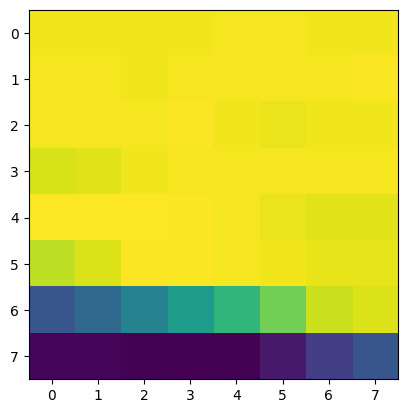

In [80]:
#displying a single block
plt.imshow(blocks[0])

In [ ]:
print(blocks[0])

# Discrete cosine transform for macro blocks

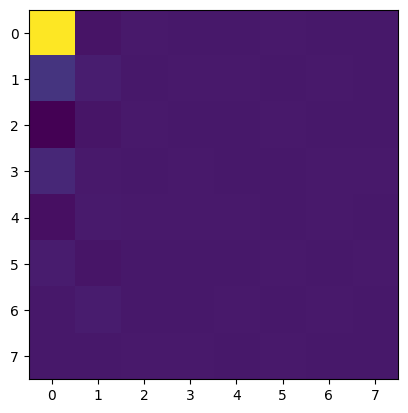

In [81]:
import numpy as np
from scipy.fft import dctn 

#perform DCT on blocks

dct_blocks = np.empty((0, 8,8))  # Initialize with the expected final shape

for index,block in enumerate(blocks):
    dct_image = dct(dct(block.astype(float), axis=0), axis=1)/2
    # dct_image = np.round(dct_image)
    dct_blocks = np.concatenate((dct_blocks, [dct_image]), axis=0)

#DCT of a single block
plt.imshow(dct_blocks[0])

In [ ]:
print(dct_blocks[0])

# Quantize

In [82]:
# def quantize_blocks(dct_blocks,level): 

    

#     if level == "high":
#         quantization_matrix = high_intensity_lum_matrix = np.array([[64, 44, 40, 64, 96, 160, 204, 244],
#                                    [48, 48, 56, 76, 104, 232, 240, 220],
#                                    [40, 52, 64, 96, 160, 228, 276, 224],
#                                    [64, 76, 96, 140, 220, 256, 288, 256],
#                                    [96, 104, 160, 204, 272, 328, 416, 484],
#                                    [160, 232, 228, 256, 328, 416, 452, 396],
#                                    [204, 240, 276, 288, 416, 452, 488, 408],
#                                    [244, 220, 224, 256, 484, 396, 408, 320]])
#     elif level == "mid":
#         quantization_matrix = np.array([[32, 22, 20, 32, 48, 80, 102, 122],
#                                [24, 24, 28, 38, 52, 116, 120, 110],
#                                [20, 26, 32, 48, 80, 114, 138, 112],
#                                [32, 38, 48, 70, 110, 128, 144, 128],
#                                [48, 52, 80, 102, 136, 164, 208, 242],
#                                [80, 116, 114, 128, 164, 208, 226, 198],
#                                [102, 120, 138, 144, 208, 226, 244, 204],
#                                [122, 110, 112, 128, 242, 198, 204, 160]])
#     else:
#         quantization_matrix = np.array([[2, 1, 1, 2, 3, 5, 6, 7],
#                                   [1, 1, 1, 2, 3, 7, 7, 6],
#                                   [1, 1, 2, 3, 5, 7, 8, 6],
#                                   [2, 2, 3, 4, 7, 8, 9, 7],
#                                   [3, 3, 5, 7, 9, 10, 13, 14],
#                                   [5, 7, 7, 8, 10, 13, 14, 12],
#                                   [6, 7, 8, 9, 13, 14, 15, 13],
#                                   [7, 6, 6, 7, 14, 12, 13, 8]])
    
    
#     quntized_blocks = np.empty((0, 8,8))  # Initialize with the expected final shape

#     for index,block in enumerate(dct_blocks):
#         quntized = block/quantization_matrix
#         quntized = np.round(quntized)
#         quntized_blocks = np.concatenate((quntized_blocks, [quntized]), axis=0)

#     quntized_blocks = quntized_blocks.astype(int)
#     return quntized_blocks
    

In [108]:
def quantize_blocks(dct_blocks,level): 

    quantization_matrix = high_intensity_lum_matrix = np.array([[16,  11,  10,  16,  24,  40,  51,  61], 
                                [12,  12,  14,  19,  26,  58,  60,  55],
                                [14,  13,  16,  24,  40,  57,  69,  56], 
                                [14,  17,  22,  29,  51,  87,  80,  62], 
                                [18,  22,  37,  56,  68, 109, 103,  77], 
                                [24,  35,  55,  64,  81, 104, 113,  92], 
                                [49,  64,  78,  87, 103, 121, 120, 101], 
                                [72,  92,  95,  98, 112, 100, 103,  99]])

    if level == "high":
        quantization_matrix = quantization_matrix*1
    elif level == "mid":
        quantization_matrix = quantization_matrix*10
    else:
        quantization_matrix = quantization_matrix*100
    
    
    quntized_blocks = np.empty((0, 8,8))  # Initialize with the expected final shape

    for index,block in enumerate(dct_blocks):
        quntized = block/quantization_matrix
        quntized = np.round(quntized)
        quntized_blocks = np.concatenate((quntized_blocks, [quntized]), axis=0)

    quntized_blocks = quntized_blocks.astype(int)
    return quntized_blocks


In [109]:
high_quntized_blocks = quantize_blocks(dct_blocks,"high")
low_quntized_blocks = quantize_blocks(dct_blocks,"low")
mid_quntized_blocks = quantize_blocks(dct_blocks,"mid")

In [116]:
uniques_low,counts_low = np.unique(high_quntized_blocks,return_counts = True)
print(len(uniques_low))

2455


# Huffman coding (entropy coding)

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

class TreeNode:
    #This class defines a node object in the huffman tree
    def __init__(self,data,probability,left=None, right=None):
        self.data = data
        self.probability = probability
        self.children = []
        self.parent = None
        self.bit = None
        self.bit_sequence = False
        self.left = left
        self.right = right

    def add_child(self,child):
        child.parent = self
        self.children.append(child)

    def assign_bits(self):
        
        if self.children:
            self.children[0].bit = "1"
            self.children[1].bit = "0"
            for i in self.children:
                i.assign_bits()
                
    def assign_bit_sequence(self):
        if not self.parent:
            for i in self.children:
                    i.assign_bit_sequence()
        if self.parent:
            self.bit_sequence = self.parent.bit_sequence + self.bit
            if self.children:
                for i in self.children:
                        i.assign_bit_sequence()
            else:
                self.bit_sequence = self.bit_sequence[1:]

    def get_leaf_values(self):

        if not self.children:
            #a leaf node
            return self.data,self.bit_sequence

        left_values = self.children[0].get_leaf_values()
        right_values = self.children[1].get_leaf_values()
        self.children[0].get_leaf_values()
        self.children[1].get_leaf_values()

        return left_values,right_values

def build_tree(codebook):
    root = TreeNode(None,None)

    for symbol, code in codebook.items():
        node = root

        for bit in code:
            if bit == "0":
                if node.left is None:
                    node.left = TreeNode(None,None)
                node = node.left
            else:
                if node.right is None:
                    node.right = TreeNode(None,None)
                node = node.right

        node.data = symbol

    return root

def huffman_decoding_tree(bit_sequence, root):
    decoded_values = []
    current_node = root
    
    for bit in bit_sequence:
        if bit == "0":
            current_node = current_node.left
        else:
            current_node = current_node.right
        if current_node.data is not None:
            decoded_values.append(current_node.data)
            current_node = root

    return decoded_values

def quantinze(number,cropped):

    image = cropped
    #quantice a number
    number_of_ranges = 7
    max_ = np.max(image)
    min_ = np.min(image)
    range_ = max_ - min_
    range_length = math.ceil(range_/number_of_ranges)
    updated_range = range_length*number_of_ranges
    value_to_add_for_range = updated_range - range_
    if (max_+ number_of_ranges) <= 255:
        max_ = max_ + value_to_add_for_range
    else:
        min_ = min_ - value_to_add_for_range
    quantized = None
    #find in which range the number is in
    #assign the quantized value 
    middle = min_ + (math.ceil((number-min_)/range_length)-1)*range_length + range_length/2 #middle value of the range it belongs
    if number<min_:
        quantized = min_
    elif number > max_:
        quantized = max_
    elif number < middle:
        quantized = min_ + (math.ceil((number-min_)/range_length)-1)*range_length
    else:
        quantized = min_ + (math.ceil((number-min_)/range_length))*range_length
    return quantized

def quantize_image(image,reference):
    uniques = np.unique(image)
    new_arr = image
    for i in uniques:
        quantized_value = quantinze(i,reference)

        new_arr = np.where(new_arr == i, quantized_value, new_arr)
    return new_arr

def flatten_tuple(nested_tuple):
    flattened_list = []
    for element in nested_tuple:
        if isinstance(element, tuple):
            flattened_list.extend(flatten_tuple(element))
        else:
            flattened_list.append(element)
    tuples_list = []
    return flattened_list

def build_huffman_tree_from_leaves(leaves_):
    #creating leaf nodes for each symbol
    sorted_leaves = sorted(leaves_, key=lambda node: node.probability, reverse=True)
    # #now itteratively create the tree
    count = 1
    while len(sorted_leaves)>1:
        new_node_probability = sorted_leaves[-1].probability + sorted_leaves[-2].probability
        new_node = TreeNode(data= f"inter_{count}",probability=new_node_probability)
        new_node.add_child(sorted_leaves[-2])
        new_node.add_child(sorted_leaves[-1]) # does this order matter
        sorted_leaves = sorted_leaves[:-2]
        sorted_leaves.append(new_node)
        sorted_leaves = sorted(sorted_leaves, key=lambda node: node.probability, reverse=True)
        count = count + 1
    sorted_leaves[-1].bit_sequence = "X" 
    sorted_leaves[-1].assign_bits()
    sorted_leaves[-1].assign_bit_sequence()
    # sorted_leaves[-1].print_tree()
    flattened_list = flatten_tuple(sorted_leaves[-1].get_leaf_values())
    tuple_list = []
    for i in range(0, len(flattened_list), 2):
        tuple_list.append((flattened_list[i], flattened_list[i + 1]))
    flattened_list = tuple_list
    
    # print(flattened_list)
    return flattened_list

def generate_huffman_code(uniques,probabilities):

    symbols_objects = []
    for data,probabiliy in zip(uniques.tolist(),probabilities):
        leaf = TreeNode(str(data),probabiliy)
        symbols_objects.append(leaf)

    codes = build_huffman_tree_from_leaves(symbols_objects)
    result = {}

    for item in codes:
        result[item[0]] = item[1]

    return result

def compress_image(huffman_code_for_cropped,image):
    #this image should be quantized using the range in the cropped image rgb channel
    array_to_compress = image.flatten()
    bit_sequence = ""
    for i in array_to_compress:
        symbol = huffman_code_for_cropped[str(i)]
        bit_sequence = bit_sequence + symbol

    return bit_sequence

def save_string_to_file(string, filename):
    #saves a given string to a text file as the given file name
    with open(filename, 'w') as f:
        f.write(string)

def get_entropy(image):
    uniques,counts = np.unique(image,return_counts = True)
    probabilities = counts/np.sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def psnr(image1, image2):   
# Convert the images to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate the mean squared error (MSE)
    mse = np.mean((image1 - image2) ** 2)

    # Check if the MSE is zero
    if mse == 0:
        return float('inf')

     # Calculate the PSNR
    psnr = 10 * np.log10(255 ** 2 / mse)
    return psnr

def average_length(image,result):
    uniques,counts = np.unique(image,return_counts = True)
    probabilities = counts/np.sum(counts)
    average_length = 0
    for unique,prob in zip(uniques,probabilities):
        code_length = len(result[str(unique)])
        average_length = average_length + code_length*prob
    return average_length


In [99]:
def compress(quntized_blocks,location):
    result_string = ''
    huffman_codes_list = []
    for index,block in enumerate(quntized_blocks):
        uniques_low,counts_low = np.unique(block,return_counts = True)
        probabilities_low = counts_low/np.sum(counts_low)
        huffman_code_low = generate_huffman_code(uniques_low,probabilities_low)
        huffman_codes_list.append(huffman_code_low)
        bit_sequence_low = compress_image(huffman_code_low,block)
        result_string = result_string + str(bit_sequence_low) + "\n"
    
    with open(location, 'w') as f:
        f.write(result_string)

    return huffman_codes_list
    

In [110]:
huffman_codes_list_high = compress(high_quntized_blocks,"high.txt")
huffman_codes_list_low = compress(low_quntized_blocks,"low.txt")
huffman_codes_list_mid = compress(mid_quntized_blocks,"mid.txt")

# Decoding the blocks

In [101]:
def decode_blocks(location,huffman_codes_list):
    # Load the text file
    with open(location, 'r') as file:
        text_string = file.read().strip()

    block_strings = text_string.split("\n")

    result_blocks = np.empty((0, 8,8))

    for index,string in enumerate(block_strings):
        tree = build_tree(huffman_codes_list[index])
        decoded_values = np.array(huffman_decoding_tree(string, tree))
        decoded_image = np.reshape(decoded_values,(8,8)).astype(int)
        result_blocks = np.concatenate((result_blocks, [decoded_image]), axis=0)
    result_blocks = result_blocks.astype(int)

    return result_blocks

In [111]:
result_blocks_high = decode_blocks('high.txt',huffman_codes_list_high)
result_blocks_low = decode_blocks('low.txt',huffman_codes_list_low)
result_blocks_mid = decode_blocks('mid.txt',huffman_codes_list_mid)

# Reconstructing the decoded blocks

In [103]:
def reconstruct_from_blocks(result_blocks):
    idct_blocks_low = np.empty((0, 8,8))  # Initialize with the expected final shape

    for index,block in enumerate(result_blocks):
        idct_image = idct(idct(block, axis=1), axis=0)
        idct_blocks_low = np.concatenate((idct_blocks_low, [idct_image]), axis=0)

    reconstructed = np.zeros(padded_image.shape)

    block_number = 0
    for i in range(num_blocks_h):
        for j in range(num_blocks_w):
            start_x = j*8
            end_x = start_x + 8
            start_y = i*8
            end_y = start_y+8
            reconstructed[start_x:end_x,start_y:end_y] = idct_blocks_low[block_number]
            block_number = block_number + 1
    
    return reconstructed

In [112]:
reconstructed_high = reconstruct_from_blocks(result_blocks_high)
reconstructed_low = reconstruct_from_blocks(result_blocks_low)
reconstructed_mid = reconstruct_from_blocks(result_blocks_mid)

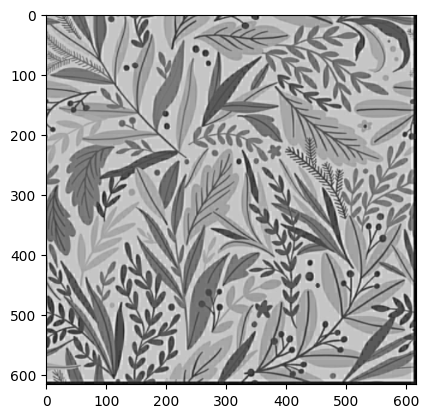

In [113]:
plt.imshow(reconstructed_high,cmap='gray')

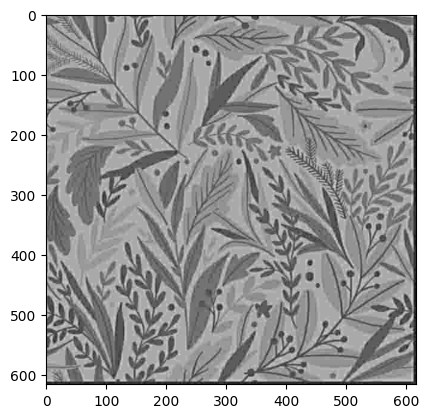

In [114]:
plt.imshow(reconstructed_low,cmap='gray')

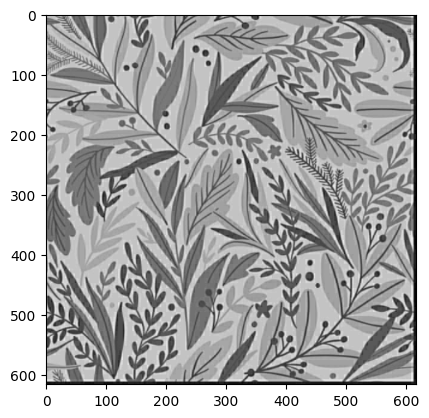

In [107]:
plt.imshow(reconstructed_mid,cmap='gray')

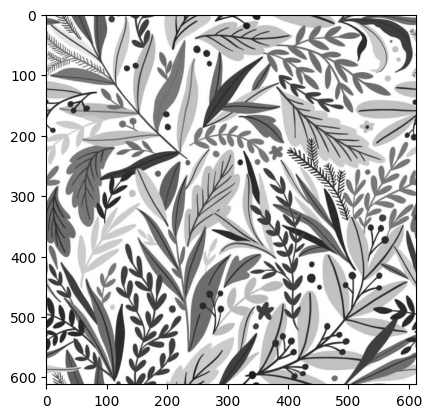

In [90]:
plt.imshow(image_array,cmap='gray')

# Calculating compression entropies

In [93]:
print("Original - ",get_entropy(image_array))
print(get_entropy(reconstructed_high))
print(get_entropy(reconstructed_mid))
print(get_entropy(reconstructed_low))


Original -  6.583837525937853
16.72553377300995
16.73440554313725
16.72998650411214


# Calculating compression ratios

In [94]:
# compression_ratio_high = 8/average_length(reconstructed_high,huffman_codes_list_high)
# compression_ratio_mid = 8/average_length(reconstructed_mid,huffman_codes_list_mid)
# compression_ratio_low = 8/average_length(reconstructed_mid,huffman_codes_list_mid)

# print(compression_ratio_high)
# print(compression_ratio_mid)
# print(compression_ratio_low)

TypeError: list indices must be integers or slices, not str